# Setup

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import time
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from ConsumptionSavingModel import ConsumptionSavingModelClass
from ConsumptionSavingModel import ConsumptionSavingModelClassNumba

**Note:** The ConSav package can be installed with: ```pip install git+https://github.com/NumEconCopenhagen/ConsumptionSaving```

# VFI

In [2]:
model_vfi = ConsumptionSavingModelClass(solmethod='VFI')
model_vfi.solve()
model_vfi.simulate()

model solved in 10.0 secs
model simulated in 4.4 secs


# EGM

In [3]:
model_egm = ConsumptionSavingModelClass(solmethod='EGM')
model_egm.solve()
model_egm.simulate()

model solved in 3.4 secs
model simulated in 4.5 secs


**Speed-up with vectorization:**

In [4]:
model_egm_vec = ConsumptionSavingModelClass(solmethod='EGMvec')
model_egm_vec.solve()
model_egm_vec.simulate()

model solved in 1.2 secs
model simulated in 4.8 secs


**Speed-up with Numba:**

In [5]:
model_egm_numba = ConsumptionSavingModelClassNumba()
model_egm_numba.solve() # initializing numba
model_egm_numba.solve()
model_egm_numba.simulate() # initializing numba
model_egm_numba.simulate()

model solved in 2.4 secs
model solved in 0.6 secs
model simulated in 3.8 secs
model simulated in 1.6 secs


# Compare

**Consumption Functions:**

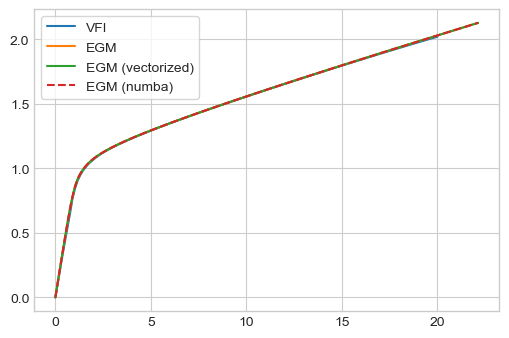

In [6]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)

ax.plot(model_vfi.sol.m[0],model_vfi.sol.c[0],label='VFI')
ax.plot(model_egm.sol.m[0],model_egm.sol.c[0],'-',label='EGM')
ax.plot(model_egm_vec.sol.m[0],model_egm_vec.sol.c[0],'-',label='EGM (vectorized)')
ax.plot(model_egm_numba.sol.m[0],model_egm_numba.sol.c[0],'--',label='EGM (numba)')

ax.legend(frameon=True)

**Distributions:**

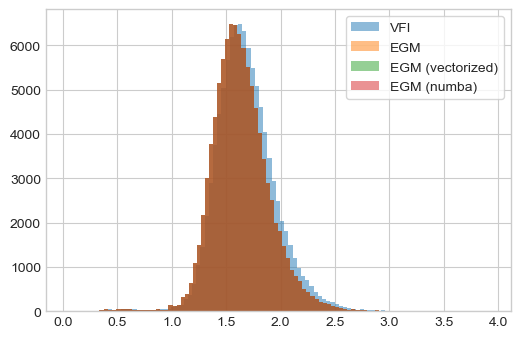

In [7]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)

ax.hist(model_vfi.sim.m[:,-1],alpha=0.50,label='VFI',bins=100)
ax.hist(model_egm.sim.m[:,-1],alpha=0.50,label='EGM',bins=100)
ax.hist(model_egm_vec.sim.m[:,-1],alpha=0.50,label='EGM (vectorized)',bins=100)
ax.hist(model_egm_numba.sim.m[:,-1],alpha=0.50,label='EGM (numba)',bins=100)

ax.legend(frameon=True)